<a href="https://colab.research.google.com/github/Azmaininqiad/ImageClassificationwithTensorflow/blob/main/Image_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import keras
keras.__version__

'2.15.0'

In [ ]:
%cd /content/drive/MyDrive/something


/content/drive/MyDrive/something


In [ ]:
%ls

'accuracy graph.png'   cattest.jpeg  'loss graph.png'   model_vgg16.h5   Testing/   Training/


In [ ]:
# import libraries
from tensorflow.keras.layers import Dense, Input, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
# set constants
IMG_SIZE = [224, 224, 3]
train_path = "Training"
test_path = "Testing"

In [ ]:
# download pretrained model
vgg16 = VGG16(input_shape=IMG_SIZE, weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
  print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
for layer in vgg16.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
folder = glob('Training/*')

In [ ]:
folder

['Training/Cat', 'Training/Dog']

In [ ]:
len(folder)

2

In [ ]:
# adding custom dense layer

model= Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Image processing

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# loading images
training_set = train_datagen.flow_from_directory('Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [ ]:

history =model.fit(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 0.9298 - accuracy: 0.5000 - val_loss: 10.8817 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 187ms/step - loss: 9.9496 - accuracy: 0.5000 - val_loss: 2.5192 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 173ms/step - loss: 1.9455 - accuracy: 0.5000 - val_loss: 3.6419 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 175ms/step - loss: 0.4365 - accuracy: 0.8333 - val_loss: 6.4968 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 176ms/step - loss: 0.2187 - accuracy: 0.8333 - val_loss: 7.1272 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 210ms/step - loss: 2.0565 - accuracy: 0.5000 - val_loss: 5.4412 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 184ms/step - loss: 0.3455 - accuracy: 0.8333 - val_loss: 2.7346 - val_accuracy: 0.5000
Epoch 8/10
1/1 [======

In [ ]:
history.history

{'loss': [0.9298499226570129,
  9.949576377868652,
  1.9454866647720337,
  0.4365241527557373,
  0.21873275935649872,
  2.056478500366211,
  0.3455497920513153,
  1.2218660231155809e-05,
  8.443841579719447e-06,
  3.458827632130124e-05],
 'accuracy': [0.5,
  0.5,
  0.5,
  0.8333333134651184,
  0.8333333134651184,
  0.5,
  0.8333333134651184,
  1.0,
  1.0,
  1.0],
 'val_loss': [10.881675720214844,
  2.5191895961761475,
  3.6419291496276855,
  6.4967756271362305,
  7.127240180969238,
  5.441237449645996,
  2.7345643043518066,
  0.439918577671051,
  0.00754929892718792,
  0.001079486683011055],
 'val_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0]}

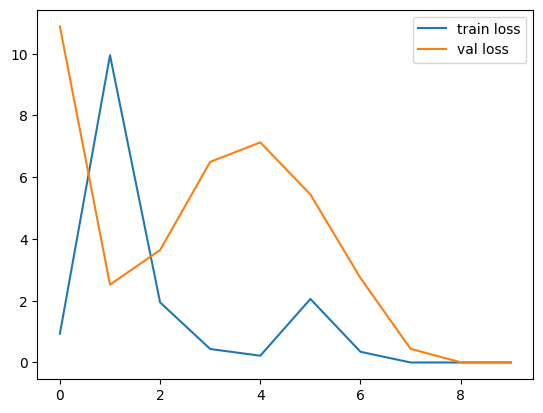

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('loss graph')

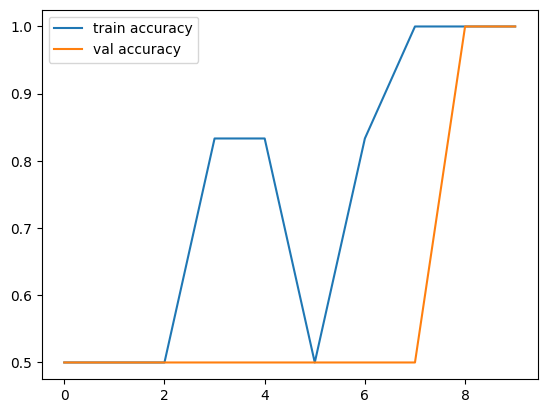

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy graph')

In [ ]:
# save model
model.save('model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# load model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('model_vgg16.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

1/1 [==============================] - 0s 185ms/step


array([[2.7461722e-04, 9.9972540e-01],
       [9.9811745e-01, 1.8825666e-03]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0])

In [ ]:
%ls

'accuracy graph.png'   cattest.jpeg  'loss graph.png'   model_vgg16.h5   Testing/   Training/


In [ ]:
# load test image

image_name="cattest.jpeg"
img= image.load_img(image_name, target_size = (224, 224))

In [ ]:
x= image.img_to_array(img)
x

array([[[255., 250., 250.],
        [255., 250., 250.],
        [255., 250., 250.],
        ...,
        [255., 250., 250.],
        [255., 250., 250.],
        [255., 250., 250.]],

       [[255., 250., 250.],
        [255., 250., 250.],
        [255., 250., 250.],
        ...,
        [255., 250., 250.],
        [255., 250., 250.],
        [255., 250., 250.]],

       [[255., 250., 250.],
        [255., 250., 250.],
        [255., 250., 250.],
        ...,
        [255., 250., 250.],
        [255., 250., 250.],
        [255., 250., 250.]],

       ...,

       [[255., 251., 248.],
        [255., 251., 248.],
        [255., 251., 248.],
        ...,
        [255., 250., 247.],
        [255., 250., 247.],
        [255., 250., 247.]],

       [[255., 251., 248.],
        [255., 251., 248.],
        [255., 251., 248.],
        ...,
        [255., 250., 247.],
        [255., 250., 247.],
        [255., 250., 247.]],

       [[255., 251., 248.],
        [255., 251., 248.],
        [255., 2

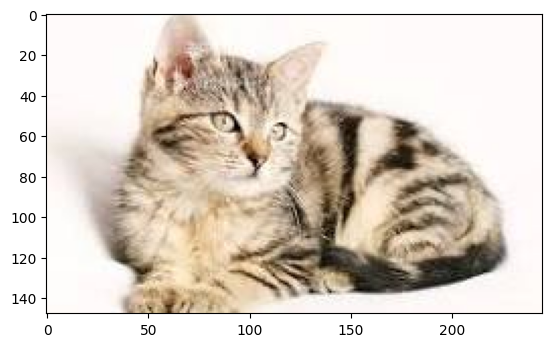

In [ ]:
z= plt.imread('cattest.jpeg')
plt.imshow(z)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x= x/255
from keras.applications.vgg16 import preprocess_input


In [ ]:
import numpy as np
x=np.expand_dims(x, axis=0)
img_data= preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.01697516, 0.98302484]], dtype=float32)

In [ ]:
result=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 20ms/step


In [ ]:
result

array([1])

In [ ]:
if result[0] == 1:
  prediction ='dog'
  print(prediction)

else:
  prediction = 'cat'
  print(prediction)

dog
